C:\Users\22970\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Cluster Statistics:
  cluster        mpg            displacement               horsepower  \
                mean        var         mean          var        mean   
0       0  26.177441  41.303375   144.304714  3511.485383   86.490964   
1       1  14.528866   4.771033   348.020619  2089.499570  161.804124   
2       2  43.700000   0.300000    91.750000    12.250000   49.000000   

                    weight                acceleration           model_year  \
          var         mean            var         mean       var       mean   
0  295.270673  2598.414141  299118.709664    16.425589  4.875221  76.734007   
1  674.075816  4143.969072  193847.051117    12.641237  3.189948  73.628866   
2    4.000000  2133.750000   21672.916667    22.875000  2.309167  80.000000   

              
         var  
0  13.060765  
1   8.173325  
2   2.666667  

Origin Class Statistics:
  origin        mpg            displacement               horsepower  \
               mean        var         mean  

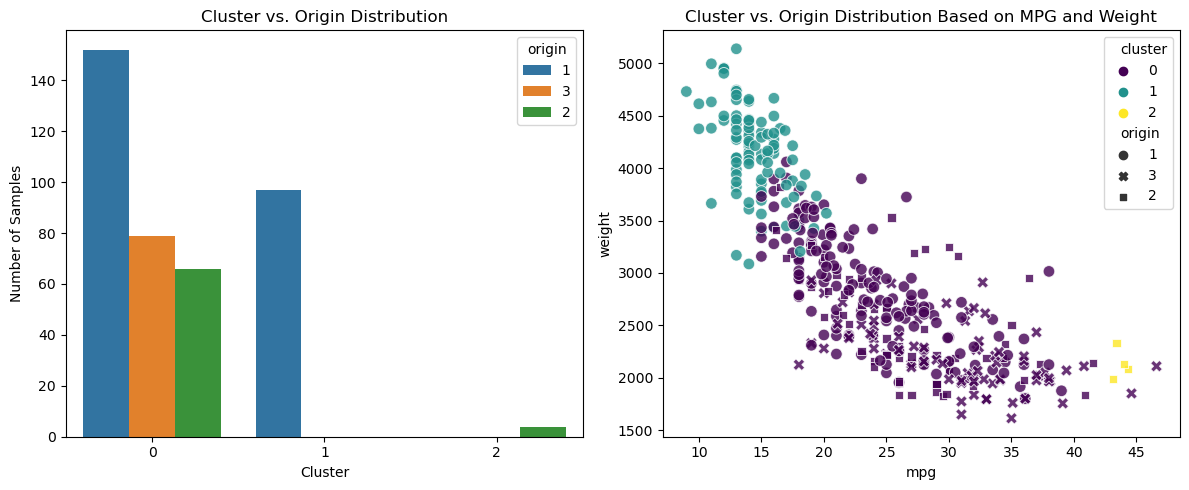

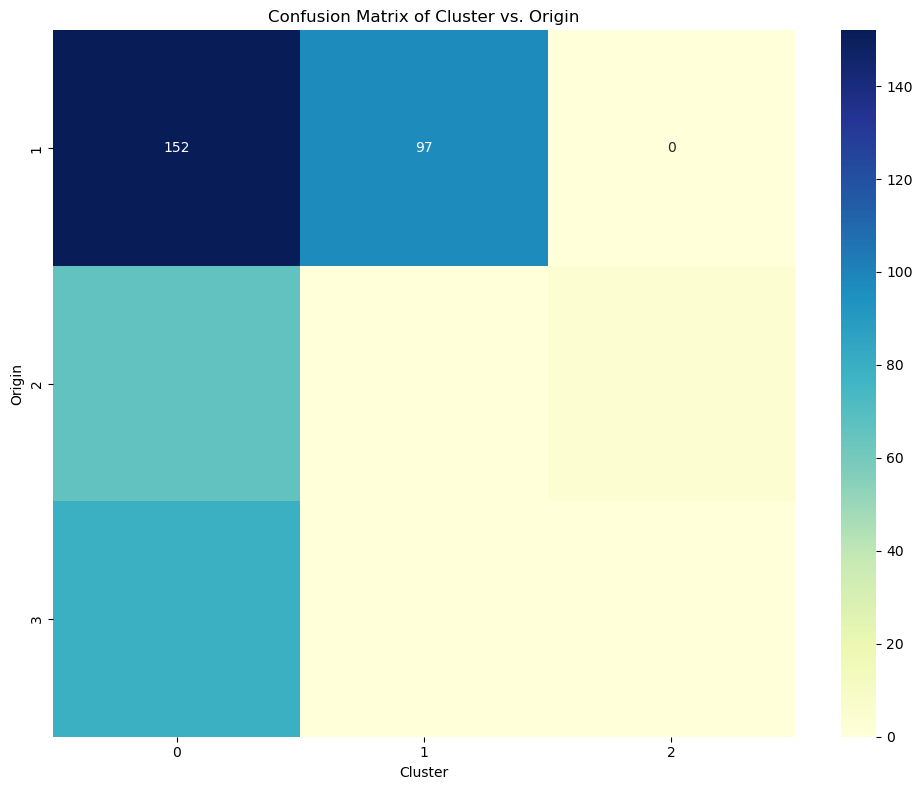

In [40]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import homogeneity_score, completeness_score
import matplotlib.pyplot as plt
import seaborn as sns
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
                'acceleration','model_year', 'origin', 'car_name']
df = pd.read_csv(url, names=column_names, na_values='?', comment='\t',
                 sep='\s+', skipinitialspace=True)
continuous_features = ['mpg', 'displacement', 'horsepower', 'weight', 
                       'acceleration','model_year']
df[continuous_features] = df[continuous_features].fillna(df[continuous_features].mean())
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[continuous_features])
clustering = AgglomerativeClustering(
    n_clusters=3,
    affinity='euclidean',
    linkage='average',
    compute_full_tree=True 
)

df['cluster'] = clustering.fit_predict(X_scaled)
df['origin'] = df['origin'].astype(str)
cluster_stats = df.groupby('cluster')[continuous_features].agg(['mean', 'var']).reset_index()
print("Cluster Statistics:")
print(cluster_stats)
origin_stats = df.groupby('origin')[continuous_features].agg(['mean', 'var']).reset_index()
print("\nOrigin Class Statistics:")
print(origin_stats)
homogeneity = homogeneity_score(df['origin'], df['cluster'])
completeness = completeness_score(df['origin'], df['cluster'])
print(f"\nHomogeneity: {homogeneity:.4f}")
print(f"Completeness: {completeness:.4f}")
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='cluster', hue='origin', data=df)
plt.title('Cluster vs. Origin Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Samples')
plt.subplot(1, 2, 2)
sns.scatterplot(x='mpg', y='weight', hue='cluster', style='origin', 
                palette='viridis', s=70, alpha=0.8, data=df)
plt.title('Cluster vs. Origin Distribution Based on MPG and Weight')
plt.tight_layout()
plt.show()
conf_matrix = pd.crosstab(df['origin'], df['cluster'], rownames=['Origin'], colnames=['Cluster'])
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix of Cluster vs. Origin')
plt.tight_layout()
plt.show()